## Saving feature (Model and environment)

In [19]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from sehec.envs.arenas.simple2d import Simple2D, Sargolini2006, BasicSargolini2006
from sehec.utils import RandomAgent

In [2]:
room_width = 15
room_depth = 7
env_name = "env_example"
time_step_size = 0.1 #seg
agent_step_size = 0.5

# Init environment
env = Simple2D(environment_name=env_name,
               arena_x_limits = np.array([-room_width/2, room_width/2]),
               arena_y_limits = np.array([-room_depth/2, room_depth/2]),
               time_step_size = time_step_size,
               agent_step_size = agent_step_size)

In [3]:
agent = RandomAgent()

In [4]:
n_steps = 1000

# Initialize environment
obs, state = env.reset()
for i in range(n_steps):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    obs, state, reward = env.step(action)

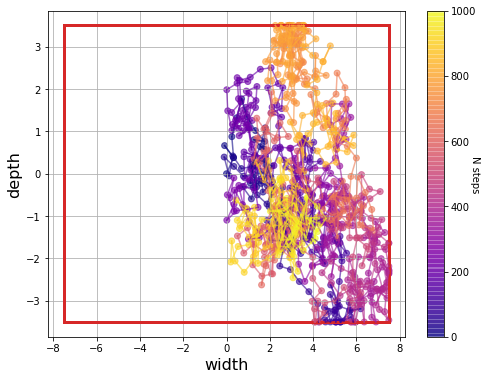

In [5]:
ax = env.plot_trajectory()
fontsize = 16
ax.grid()
# ax.legend(fontsize=fontsize, loc="upper left")
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
plt.show()

In [6]:
env.save_environment("testing_save.env")

In [7]:
env2 = Simple2D(environment_name="not_the_same",
                arena_x_limits = np.array([-room_width/2, room_width/2]),
                arena_y_limits = np.array([-room_depth/2, room_depth/2]),
                time_step_size = time_step_size,
                agent_step_size = agent_step_size)

<AxesSubplot:>

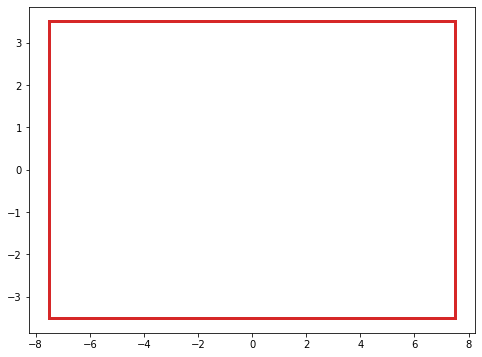

In [8]:
env2.reset()
env2.plot_trajectory()

In [9]:
env == env2

False

In [10]:
env2.restore_environment("testing_save.env")

In [11]:
env2.__dict__.keys()

dict_keys(['environment_name', 'env_kwargs', 'metadata', 'time_step_size', 'state', 'history', 'global_steps', 'global_time', 'arena_x_limits', 'arena_y_limits', 'arena_limits', 'room_width', 'room_depth', 'agent_step_size', 'state_dims_labels', 'default_walls', 'custom_walls', 'wall_list'])

In [12]:
env.__dict__.keys()

dict_keys(['environment_name', 'env_kwargs', 'metadata', 'time_step_size', 'state', 'history', 'global_steps', 'global_time', 'arena_x_limits', 'arena_y_limits', 'arena_limits', 'room_width', 'room_depth', 'agent_step_size', 'state_dims_labels', 'default_walls', 'custom_walls', 'wall_list'])

In [13]:
env == env2

True

<AxesSubplot:>

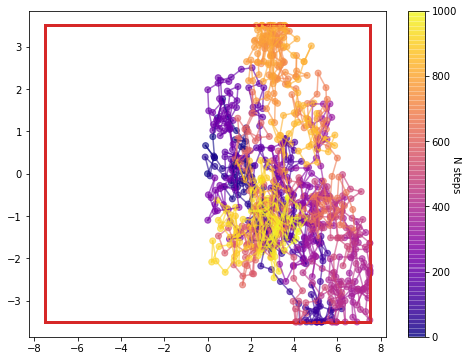

In [14]:
env2.plot_trajectory()

## Core classes running on their own

In [15]:
from sehec.envs.envcore import Environment
from sehec.models.modelcore import NeuralResponseModel

In [16]:
env = Environment(name="core_env",
                  time_step_size=1.0)

In [17]:
agent = NeuralResponseModel()

In [18]:
n_steps = 1000

# Initialize environment
obs, state = env.reset()
for i in range(n_steps):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    obs, state, reward = env.step(action)

## Standarize experimental data